Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 - cost= 163.700474503 - Accuracy= 0.8656
Epoch: 0002 - cost= 39.016888947 - Accuracy= 0.9029
Epoch: 0003 - cost= 24.375254579 - Accuracy= 0.9146
Epoch: 0004 - cost= 16.764213821 - Accuracy= 0.9234
Epoch: 0005 - cost= 12.335551016 - Accuracy= 0.927
Epoch: 0006 - cost= 9.015702676 - Accuracy= 0.9326
Epoch: 0007 - cost= 6.664178150 - Accuracy= 0.9354
Epoch: 0008 - cost= 4.987441774 - Accuracy= 0.9351
Epoch: 0009 - cost= 3.667640415 - Accuracy= 0.9382
Epoch: 0010 - cost= 2.701502774 - Accuracy= 0.9412
Epoch: 0011 - cost= 2.042738809 - Accuracy= 0.9438
Epoch: 0012 - cost= 1.481212360 - Accuracy= 0.9412
Epoch: 0013 - cost= 1.172495082 - Accuracy= 0.9447
Epoch: 0014 - cost= 0.900492724 - Accuracy= 0.9442
Epoch: 0015 - cost= 0.773186459 - Accuracy= 0.9443
Epoch: 0016 - cost= 0.610075228 - Accura

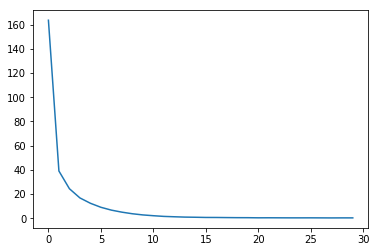

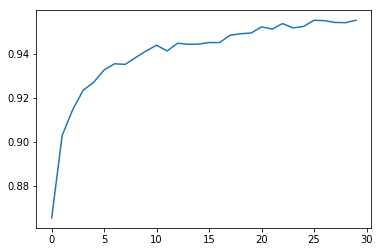

Accuracy: 0.9551


In [3]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as  plt



In [4]:
# Parameters
learning_rate = 0.001
training_epochs = 30
batch_size = 100
display_step = 1

In [5]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [6]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


In [7]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [8]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [9]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [ ]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
